In [6]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

def get_VOCAB(corpus):
   # Getting Tokenize the news text
    corpus = corpus.apply(tokenizer.tokenize)

    # news information
    all_words = [word for tokens in corpus for word in tokens]
    sentence_lengths = [len(tokens) for tokens in corpus]

    VOCAB = sorted(list(set(all_words)))
    print("Data with StopWord :")
    print("- words total =", len(all_words))
    print("- vocabulary size =" , len(VOCAB))
    print("- Max sentence length =", max(sentence_lengths))
    print("- Min sentence length =", min(sentence_lengths))    

    return all_words, sentence_lengths,VOCAB

# Real Data

In [7]:
from sklearn.utils import shuffle
import pandas as pd 
real_df= pd.read_csv('/content/drive/MyDrive/Arabic_FakeNews/Model/Balance/Data/sub_real_news.csv',index_col=0)
real_df.shape

(6000, 5)

In [8]:
real_df.head(3)

,title,description,source,text,desc_length
51929,روسيا تغلق قاعدة تجسس في كوبا,أعلنت روسيا اليوم أنها ستغلق محطة تجسس تابعة ل...,aljazeera.net,أعلنت روسيا اليوم أنها ستغلق محطة تجسس تابعة ل...,37
332,أولمرت: كسبنا الحرب في لبنان,قال رئيس الوزراء الإسرائيلي إيهود أولمرت لصحيف...,aljazeera.net,قال رئيس الوزراء الإسرائيلي إيهود أولمرت لصحيف...,25
29774,أسقف: هجمات نيجيريا حرب دينية,وصف زعيم مسيحي في نيجيريا هجماتٍ شملت كنائس قب...,aljazeera.net,نساء وأطفال نزحوا بسبب اشتباكات بين جماعة بوكو...,33


In [9]:
real_df['source'].value_counts().to_frame()


,source
aljazeera.net,2000
arabic.rt.com,2000
bbc.com,2000


In [ ]:
real_description = real_df.description.loc[real_df.desc_length>=200].count()
real_description

0

In [ ]:
real_description = real_df.description.loc[real_df.desc_length>=150].count()
real_description

0

In [ ]:
real_description = real_df.description.loc[real_df.desc_length>=100].count()
real_description

0

In [ ]:
real_description = real_df.description.loc[real_df.desc_length>=80].count()
real_description

0

### Title

In [ ]:
all_words, sentence_lengths,VOCAB = get_VOCAB(real_df["title"])

Data with StopWord :
- words total = 46360
- vocabulary size = 14532
- Max sentence length = 22
- Min sentence length = 4


In [10]:
total_lens = 0
for sent in real_df['title']:
    total_lens+=len(sent.split())

print(total_lens/len(real_df['title']))

7.678166666666667


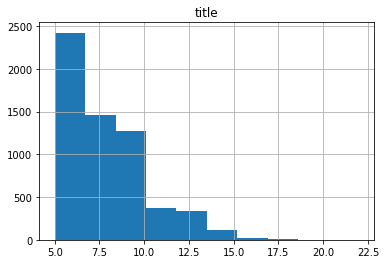

In [ ]:
import matplotlib.pyplot as plt

real_count = []

for sent in real_df['title']:
    real_count.append(len(sent.split()))

length_df = pd.DataFrame({'title':real_count})

length_df.hist(bins = 10)
plt.show()

In [11]:
#Check how much % of title have 0-20 words
cnt=0
for i in real_df['title']:
    if(len(i.split())<=20):
        cnt=cnt+1


print(cnt/len(real_df['title']))

1.0


### Description

In [ ]:
all_words, sentence_lengths,VOCAB = get_VOCAB(real_df["description"])

Data with StopWord :
- words total = 168800
- vocabulary size = 31293
- Max sentence length = 79
- Min sentence length = 1


In [12]:
total_lens = 0
for sent in real_df['description']:
    total_lens+=len(sent.split())

print(total_lens/len(real_df['description']))

28.0415


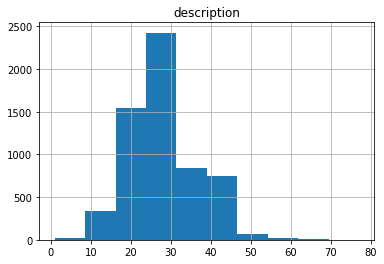

In [ ]:
import matplotlib.pyplot as plt

real_count = []

for sent in real_df['description']:
    real_count.append(len(sent.split()))

length_df = pd.DataFrame({'description':real_count})

length_df.hist(bins = 10)
plt.show()

In [ ]:
#Check how much % of title have 0-20 words
cnt=0
for i in real_df['description']:
    if(len(i.split())<=50):
        cnt=cnt+1


print(cnt/len(real_df['description']))

0.991


### Text

In [ ]:
all_words, sentence_lengths,VOCAB = get_VOCAB(real_df["text"])

Data with StopWord :
- words total = 1871014
- vocabulary size = 124605
- Max sentence length = 5351
- Min sentence length = 21


In [13]:
total_lens = 0
for sent in real_df['text']:
    total_lens+=len(sent.split())

print(total_lens/len(real_df['text']))

303.9626666666667


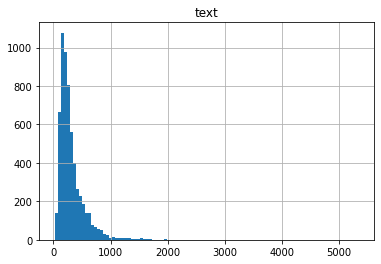

In [ ]:
import matplotlib.pyplot as plt

real_count = []

for sent in real_df['text']:
    real_count.append(len(sent.split()))

length_df = pd.DataFrame({'text':real_count})

length_df.hist(bins = 100)
plt.show()

## labeled data

In [14]:
real_df['label']="real"
real_df.drop(columns=['title','text','desc_length'],axis=1,inplace=True)
real_df.rename(columns = {'description' : 'text'}, inplace = True)
real_df = shuffle(real_df) ## shuffle all the datapoints

real_df.head()

,text,source,label
520263,إطلاق حارس إسرائيلي النار قرب السفارة الإسرائي...,bbc.com,real
598435,اندلعت يوم الجمعة اشتباكات في العاصمة اليمنية ...,bbc.com,real
98676,يستعد برونيسلاف كوموروفسكي القائم بأعمال الرئي...,aljazeera.net,real
549470,الصحف العربية الصادرة الخميس تتساءل عن هوية رئ...,bbc.com,real
354069,اختار الاتحاد الدولي للسباحة، الاثنين 5 ديسمبر...,arabic.rt.com,real


# Fake Data

In [15]:
fake_df = pd.read_excel("drive/My Drive/Arabic_FakeNews/Model/Corpora/main_fake_news.xlsx")
fake_df.drop(columns=['title','sub-title','category','has social link','claiming-type','link'],axis=1,inplace=True)
fake_df.head(4)

,claiming,fake-type,source
0,انتبهو يا جماعه وفهمو ولدكو\nعاجل وخطير . مخدر...,partially-fake,fatabyyano
1,بعد اعلان الرئيس الإيطالي تسليم الأمر إلى السم...,fake,fatabyyano
2,“هكذا حال الصين مع وباء الفايروس المنتشر مؤخرا”,fake,fatabyyano
3,حال المسلمين والمسلمات في الصين.. التعذيب على ...,fake,fatabyyano


In [17]:
fake_df['fake-type']='fake'

In [16]:
fake_df.shape

(2016, 3)

In [ ]:
#rename columns
fake_df.rename(columns = {'claiming' : 'text', 'fake-type' : 'label'}, inplace = True)
fake_df.head(4)

,text,label,source
0,انتبهو يا جماعه وفهمو ولدكو\nعاجل وخطير . مخدر...,fake,fatabyyano
1,بعد اعلان الرئيس الإيطالي تسليم الأمر إلى السم...,fake,fatabyyano
2,“هكذا حال الصين مع وباء الفايروس المنتشر مؤخرا”,fake,fatabyyano
3,حال المسلمين والمسلمات في الصين.. التعذيب على ...,fake,fatabyyano


In [ ]:
fake_df["text"].duplicated().sum()

3

In [ ]:
fake_df.drop_duplicates(subset=['text'],inplace=True)  #dropping duplicates
fake_df.dropna(axis=0,inplace=True)   #dropping na
fake_df.shape

(2013, 3)

In [ ]:
fake_df['description_length'] = fake_df.text.str.split().str.len()

In [ ]:
children = fake_df.text.loc[fake_df.description_length >= 300]
children.count()

2

In [ ]:
children = fake_df.text.loc[fake_df.description_length >= 250]
children.count()

4

In [ ]:
children = fake_df.text.loc[fake_df.description_length >= 200]
children.count()

11

In [ ]:
children = fake_df.text.loc[fake_df.description_length >= 150]
children.count()

41

In [ ]:
children = fake_df.text.loc[fake_df.description_length >= 100]
children.count()

115

In [ ]:
children = fake_df.text.loc[fake_df.description_length >= 80]
children.count()

175

In [ ]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

def get_VOCAB(corpus):
   # Getting Tokenize the news text
    corpus = corpus.apply(tokenizer.tokenize)

    # news information
    all_words = [word for tokens in corpus for word in tokens]
    sentence_lengths = [len(tokens) for tokens in corpus]

    VOCAB = sorted(list(set(all_words)))
    print("Data with StopWord :")
    print("- words total =", len(all_words))
    print("- vocabulary size =" , len(VOCAB))
    print("- Max sentence length =", max(sentence_lengths))
    print("- min sentence length =", min(sentence_lengths))    
    
    return all_words, sentence_lengths,VOCAB

In [ ]:
all_words, sentence_lengths,VOCAB = get_VOCAB(fake_df["text"])

Data with StopWord :
- words total = 66729
- vocabulary size = 21013
- Max sentence length = 339
- min sentence length = 3


In [ ]:
total_lens = 0
for sent in fake_df['text']:
    total_lens+=len(sent.split())

print(total_lens/len(fake_df['text']))

33.49180327868852


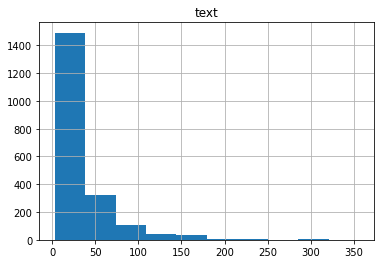

In [ ]:
import matplotlib.pyplot as plt

real_count = []

for sent in fake_df['text']:
    real_count.append(len(sent.split()))

length_df = pd.DataFrame({'text':real_count})

length_df.hist(bins = 10)
plt.show()

In [ ]:
#Check how much % of title have 0-20 words
cnt=0
for i in fake_df['text']:
    if(len(i.split())<=33 ):
        cnt=cnt+1


print(cnt/len(fake_df['text']))

0.7019374068554396


In [ ]:
longest_text= 0
for sent in fake_df['text']:
    if len(sent.split()) > longest_text:
        longest_text = len(sent.split())

print(longest_text)

356


In [ ]:
fake_df.drop(columns=['description_length'],axis=1,inplace=True)

# Combine Data

In [ ]:
fake_df.shape,real_df.shape

((2013, 3), (6000, 3))

In [ ]:
final_data = pd.concat([fake_df, real_df], axis=0)
final_data = shuffle(final_data) ## shuffle all the datapoints
final_data

,text,label,source
555877,معارضون سوريون يقولون إن إحدى بلدات ريف حماة ب...,real,bbc.com
27431,قفزت أسعار النفط للعقود الآجلة فوق مستوى 73 دو...,real,aljazeera.net
1960,وكالة الفضاء الأميركية ناسا، تعيش حالة رعب، ب...,fake,misbar
592509,"شركة ""سوني ميوزك"" للتسجيلات الموسيقية تعلن اعت...",real,bbc.com
556270,مستخدمون يشكون من أن البطاقات الإلكترونية الدا...,real,bbc.com
...,...,...,...
579,إيطاليا تهتف ... تحيا مصر ❤️❤️,fake,fatabyyano
3607,قال الأمين العام لحزب الله في لبنان حسن نصر ال...,real,aljazeera.net
368,سحابة على شكل انسان يصلي ...سبحان الله 😲🕋🕌 اغل...,fake,fatabyyano
545848,نجما هوليوود جوني ديب وأمبر هيرد يتوصلان إلى ت...,real,bbc.com


In [ ]:
print(len(final_data))

8013


In [ ]:
final_data["label"].value_counts()

real    6000
fake    2013
Name: label, dtype: int64

In [ ]:
### convert real 1 and fake 0
final_data['label']=final_data['label'].apply(lambda x: 1 if x=='real' else 0 )
final_data

,text,label,source
555877,معارضون سوريون يقولون إن إحدى بلدات ريف حماة ب...,1,bbc.com
27431,قفزت أسعار النفط للعقود الآجلة فوق مستوى 73 دو...,1,aljazeera.net
1960,وكالة الفضاء الأميركية ناسا، تعيش حالة رعب، ب...,0,misbar
592509,"شركة ""سوني ميوزك"" للتسجيلات الموسيقية تعلن اعت...",1,bbc.com
556270,مستخدمون يشكون من أن البطاقات الإلكترونية الدا...,1,bbc.com
...,...,...,...
579,إيطاليا تهتف ... تحيا مصر ❤️❤️,0,fatabyyano
3607,قال الأمين العام لحزب الله في لبنان حسن نصر ال...,1,aljazeera.net
368,سحابة على شكل انسان يصلي ...سبحان الله 😲🕋🕌 اغل...,0,fatabyyano
545848,نجما هوليوود جوني ديب وأمبر هيرد يتوصلان إلى ت...,1,bbc.com


In [ ]:
# Write final_data to new file
final_data.to_csv('drive/My Drive/Arabic_FakeNews/Model/Balance/DataDescr/final_news.csv', index=False)
print("Done :) ")


Done :) 


In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(final_data["text"], final_data['label'], test_size=0.2, random_state=1)

train_df = pd.DataFrame({'text':x_train ,'label':y_train})

x_train, x_val, y_train, y_val = train_test_split(train_df["text"], train_df["label"], test_size=0.2, random_state=1)

train_df = pd.DataFrame({'text':x_train ,'label':y_train})
train_df.to_csv('drive/My Drive/Arabic_FakeNews/Model/Balance/DataDescr/train_news.csv', index=False)


val_df=pd.DataFrame({'text':x_val ,'label':y_val})
val_df.to_csv('drive/My Drive/Arabic_FakeNews/Model/Balance/DataDescr/val_news.csv', index=False)

test_df = pd.DataFrame({'text':x_test ,'label':y_test})
test_df.to_csv('drive/My Drive/Arabic_FakeNews/Model/Balance/DataDescr/test_news.csv', index=False)

In [ ]:
longest_text= 0
for sent in train_df['text']:
  #print(sent)
  if len(sent.split()) > longest_text:
      longest_text = len(sent.split())

print(longest_text)

316


In [ ]:
train_df.label.value_counts().sort_values()

0    1270
1    3858
Name: label, dtype: int64

In [ ]:
val_df.label.value_counts().sort_values()

0    343
1    939
Name: label, dtype: int64

In [ ]:
test_df.label.value_counts().sort_values()

0     400
1    1203
Name: label, dtype: int64

# arabert preprocess V02

In [ ]:
!pip install -q transformers
!pip -q install farasapy
!git clone https://github.com/aub-mind/arabert
!pip -q install pyarabic

     |████████████████████████████████| 2.6 MB 5.0 MB/s 
     |████████████████████████████████| 3.3 MB 38.1 MB/s 
     |████████████████████████████████| 895 kB 54.6 MB/s 
     |████████████████████████████████| 636 kB 63.2 MB/s 
Cloning into 'arabert'...
remote: Enumerating objects: 544, done.
remote: Counting objects: 100% (330/330), done.
remote: Compressing objects: 100% (237/237), done.
remote: Total 544 (delta 175), reused 237 (delta 87), pack-reused 214
Receiving objects: 100% (544/544), 9.15 MiB | 15.36 MiB/s, done.
Resolving deltas: 100% (298/298), done.
     |████████████████████████████████| 126 kB 4.9 MB/s 


In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from arabert.preprocess import ArabertPreprocessor

In [ ]:
#Call Model
model_name="bert-base-arabertv02"
processor = ArabertPreprocessor(model_name=model_name)

In [ ]:
train_df.text = train_df.text.apply(lambda x:   processor.preprocess(x))
train_df.to_csv('drive/My Drive/Arabic_FakeNews/Model/Balance/DataDescr/PPV2train_news.csv', index=False)

val_df.text = val_df.text.apply(lambda x:   processor.preprocess(x))
val_df.to_csv('drive/My Drive/Arabic_FakeNews/Model/Balance/DataDescr/PPV2val_news.csv', index=False)

test_df.text = test_df.text.apply(lambda x:   processor.preprocess(x))
test_df.to_csv('drive/My Drive/Arabic_FakeNews/Model/Balance/DataDescr/PPV2test_news.csv', index=False)

In [ ]:
longest_text= 0
for sent in train_df['text']:
  #print(sent)
  if len(sent.split()) > longest_text:
      longest_text = len(sent.split())

print(longest_text)

414


In [ ]:
train_df.label.value_counts().sort_values()

0    1270
1    3858
Name: label, dtype: int64

In [ ]:
train_df.head()

,text,label
467341,قررت المديرية العامة للجوازات السعودية فرض غرا...,1
587,صاروخ موجه هو السبب بحادثة بيروت ويظهر في الفي...,0
347261,تعرض نجم نادي برشلونة ، الأرجنتيني ليونيل ميسي...,1
1080,محاولة اغتيال الامام ماهر المعيقلي امام الحرم ...,0
546370,نادي ساندرلاند الانجليزي يفاجي كريستال بالاس ف...,1


In [ ]:
val_df.label.value_counts().sort_values()

0    343
1    939
Name: label, dtype: int64

In [ ]:
test_df.label.value_counts().sort_values()

0     400
1    1203
Name: label, dtype: int64

In [ ]:
test_df.head()

,text,label
509,الطائر الوحيد الذي يغطي وجهه عند شرب الماء في ...,0
66587,أفاد مراسل الجزيرة بأن رئيسي السودان عمر البشي...,1
1639,عااجل GDS : كريستيانو رونالدو تعرض ل حادث مرور...,0
1051,قيس السعيد يستقبل حاخام اسرائيلي لبحث سبل تعزي...,0
1350,شاهدوا اسرع هروب في التاريخ يقال انها رئيسة مج...,0
